In [1]:
import cv2
import numpy as np

In [2]:
# Load our image
image = cv2.imread('images/bunchofshapes.jpg')
#cv2.imshow('0 - Original Image', image)
#cv2.waitKey(0)

In [3]:
# Create a black image with same dimensions as our loaded image
blank_image = np.zeros((image.shape[0], image.shape[1], 3))

# Create a copy of our original image
orginal_image = image

# Grayscale our image
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [4]:
# Find Canny edges
edged = cv2.Canny(gray, 50, 200)
#cv2.imshow('1 - Canny Edges', edged)
#cv2.waitKey(0)

In [5]:
# Find contours and print how many were found
contours, hierarchy = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print ("Number of contours found = " + str(len(contours)))

#Draw all contours
cv2.drawContours(blank_image, contours, -1, (0,255,0), 3)
#cv2.imshow('2 - All Contours over blank image', blank_image)
#cv2.waitKey(0)

# Draw all contours over blank image
cv2.drawContours(image, contours, -1, (0,255,0), 3)
#cv2.imshow('3 - All Contours', image)
#cv2.waitKey(0)
cv2.destroyAllWindows()

Number of contours found = 4


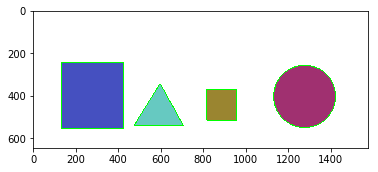

In [7]:
#if want to plot then 
import matplotlib.pyplot as plt
plt.imshow(image)

In [8]:
#method of finding contour area of shapes
#get contours from previous 
def get_contour_area(contours):
    all_area =[]
    for cnt in contours:
        area = cv2.contourArea(cnt)
        all_area.append(area)
    return all_area

In [9]:
print(get_contour_area(contours))

[20587.5, 22901.5, 66579.5, 90222.0]


In [11]:
#after sort the area of shapes
sorted_contours = sorted(contours, key = cv2.contourArea, reverse = True)
print ("Contor Areas after sorting")
print (get_contour_area(sorted_contours))

Contor Areas after sorting
[90222.0, 66579.5, 22901.5, 20587.5]


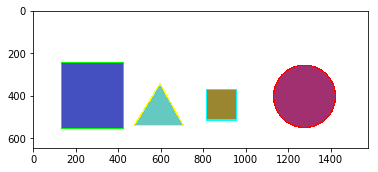

In [14]:
#now print sorted shape 

for i, c in enumerate(sorted_contours):
    if i == 0:
        cv2.drawContours(orginal_image, [c], -1, (0,255,0), 5)
        plt.imshow(orginal_image)
    if i == 1:
        cv2.drawContours(orginal_image, [c], -1, (255,0,0), 5)
        plt.imshow(orginal_image)
    if i == 2:
        cv2.drawContours(orginal_image, [c], -1, (255,255,0), 5)
        plt.imshow(orginal_image)
    if i == 3:
        cv2.drawContours(orginal_image, [c], -1, (0,255,255), 5)
        plt.imshow(orginal_image)
